# CEPH vars Illumina

There are various call sets (VCF files) for each CEPH/Utah grandparent (individual).  Two of these VCFs---labeled with S1 and S1.genome, respectively---have identical headers but they differ greatly in size (hence in number of records).  This analysis shows that S1 is a filtered version of S1.genome.  Specifically, monomorphic reference variants (labeled as no-ALTs) have been removed from S1.genome to produce S1.

## Preliminaries

In [7]:
library(lme4)
library(lattice)
library(latticeExtra)
lattice.options(default.args = list(as.table = TRUE))
#lattice.options(default.theme = "standard.theme")

The `dostats` bash script produces call set partitions and related statistics (counts) based on *S1* and *S1.genome* for each of the individuals (grandparents).

Explanation of call set partitions denoted such as *0001*:


In [8]:
readme <- read.delim(file = "NA12889/README.txt", skip = 4, header = FALSE)
readme$V1 <- sub("^.*(000[0-3]).*$", "\\1", readme$V1)
readme$V2 <- gsub(".vcf.gz", "", readme$V2)
readme$V2 <- gsub("/\\S+/NA128[89][9012]_", "", readme$V2)
readme$V2 <- gsub("for records ", "", readme$V2)
readme$V3 <- gsub(".vcf.gz", "", readme$V3)
readme$V3 <- gsub("/\\S+/NA128[89][9012]_", "", readme$V3)
readme

V1,V2,V3
0000,private to,S1
0001,private to,S1.genome
0002,from S1 shared by both,S1 S1.genome
0003,from S1.genome shared by both,S1 S1.genome


Get the count for each individual, callset partition, and variant type:



In [9]:
indiv <- paste0("NA128", 89:92)
names(indiv) <- indiv
SN <- lapply(indiv, function(y) {
           df <- read.delim(file = paste0(y, "/SN.stats.tsv"), header = FALSE,
                            col.names = c("Set", "Null", "Variant.type", "Count"))
           df$Individual <- y
           df$Null <- NULL
           return(df)
})
SN <- do.call(rbind, SN)
SN$Set <- sub(".vcf.gz.stats", "", SN$Set) # remove file extension
SN$Set <- factor(sub("^.*_(S1.*$)", "\\1", SN$Set)) # remove individual-specific info from Set
SN$Set <- factor(SN$Set, levels = levels(SN$Set)[c(5:6, 1:4)], ordered = TRUE)
#levels(SN$Set) <- levels(SN$Set)[c(5:6, 1:4)]

## Counts of variants by type and callset partition

Let's take individual NA12889 as an example.  The following plot shows that *S1.genome* has a lot more records (*number of records*) and this difference is solely attributable to the fact that the *number of no-ALTs* is high for *S1.genome* but zero for *S1*.

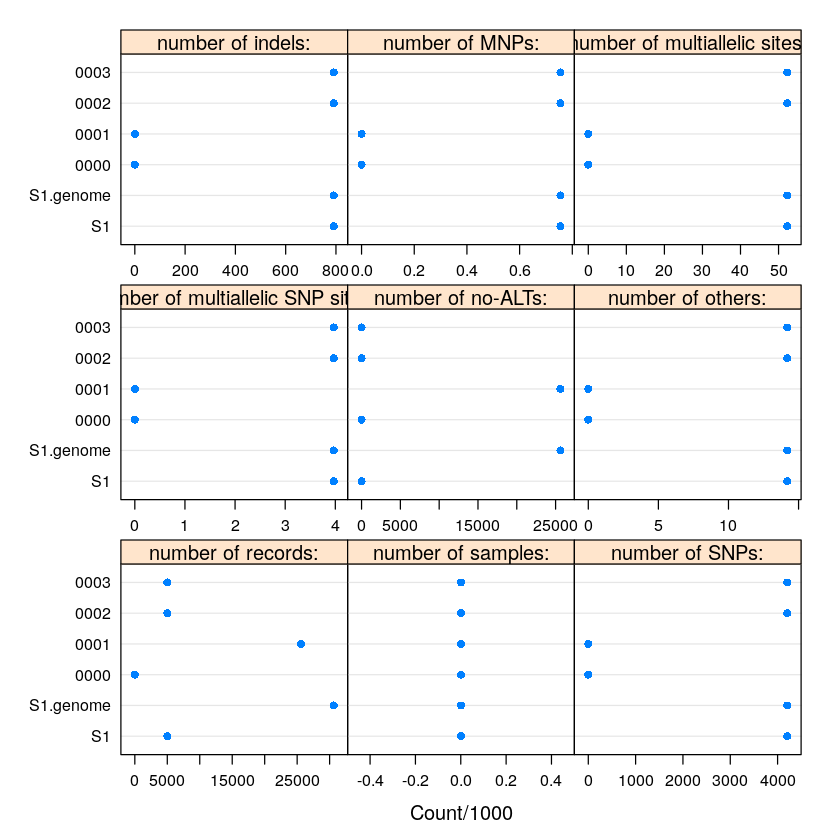

In [10]:
dotplot(Set ~ Count / 1000 | Variant.type, data = SN, subset = Individual == "NA12889", scales = list(x = list(relation = "free")))

The same data are plotted somewhat differently below.  This representation shows that most of the records in *S1.genome* are *no-ALTs*, which are completely missing in *S1*.

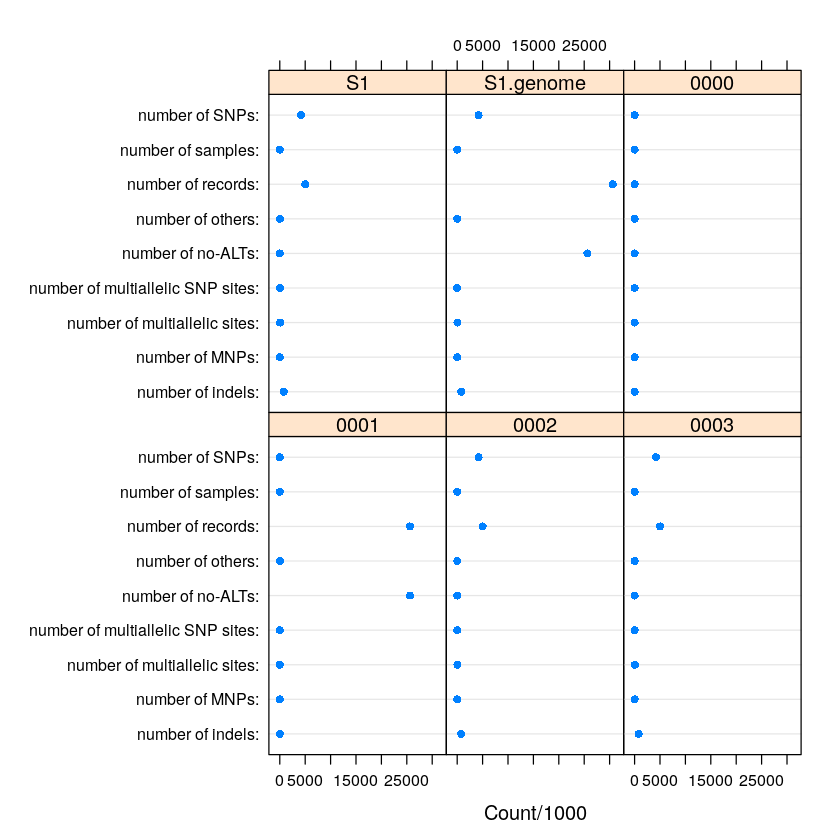

In [11]:
dotplot(Variant.type ~ Count / 1000 | Set, data = SN, subset = Individual == "NA12889")

## Conclusion

The above plots also demonstrate that apart from *number of no-ALTs* the two callsets, *S1* and *S1.genome* are identical. Thus, *S1* was obtained from  *S1.genome* by removing the *no-ALTs* type of variants.

This is supported by the following small subsets of *S1.genome* and *S1*:

## Other individuals

Recall that the above analysis used only individual NA12889.  The plot below shows that the results are very similar for all other individuals:


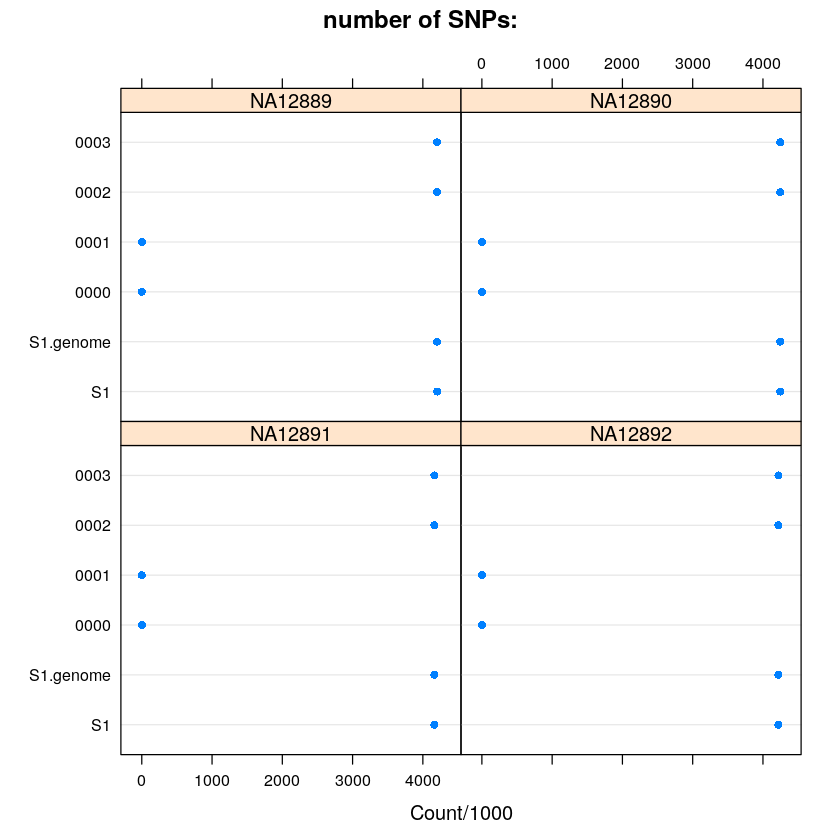

In [14]:
dotplot(Set ~ Count / 1000 | Individual, data = SN, subset = Variant.type == "number of SNPs:", main = "number of SNPs:")

In [ ]:
ll